# Exploratory Data Analysis - Food Sales

https://www.kaggle.com/datasets/rajatsurana979/fast-food-sales-report

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('Fast_Food.csv')

In [57]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [59]:
df['item_name'].unique()

array(['Aalopuri', 'Vadapav', 'Sugarcane juice', 'Panipuri', 'Frankie',
       'Sandwich', 'Cold coffee'], dtype=object)

In [60]:
df.nunique()

order_id              1000
date                   348
item_name                7
item_type                2
item_price               5
quantity                15
transaction_amount      48
transaction_type         2
received_by              2
time_of_sale             5
dtype: int64

In [61]:
df.describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


In [62]:
df.describe(include = object)

,date,item_name,item_type,transaction_type,received_by,time_of_sale
count,1000,1000,1000,893,1000,1000
unique,348,7,2,2,2,5
top,10-11-2022,Cold coffee,Fastfood,Cash,Mr.,Night
freq,8,161,686,476,512,205


In [63]:
df.isna().sum()

order_id                0
date                    0
item_name               0
item_type               0
item_price              0
quantity                0
transaction_amount      0
transaction_type      107
received_by             0
time_of_sale            0
dtype: int64

There is 107 transactions_type with n/a values. I can delete these but the rows they are associated with are valuable for creating graphs and the EDA overall. I will then create a new category 'unknown'

In [64]:
df['transaction_type'] = df['transaction_type'].fillna('unknown')

In [13]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,unknown,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [65]:
df.duplicated().sum()

0

Our data is all good now, we can start the EDA.

### Graphs

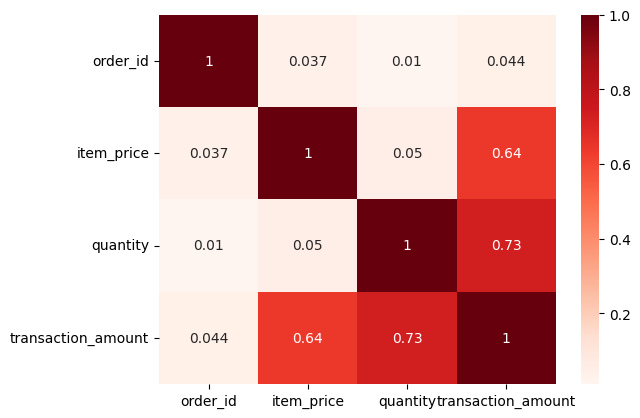

In [66]:
numeric_columns = df.select_dtypes(include= ['number'])
sns.heatmap(numeric_columns.corr(),cmap = 'Reds', annot =True)
plt.show()

C:\Users\namdn\AppData\Local\Temp\ipykernel_12820\1927661928.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='item_name',palette="Set2")


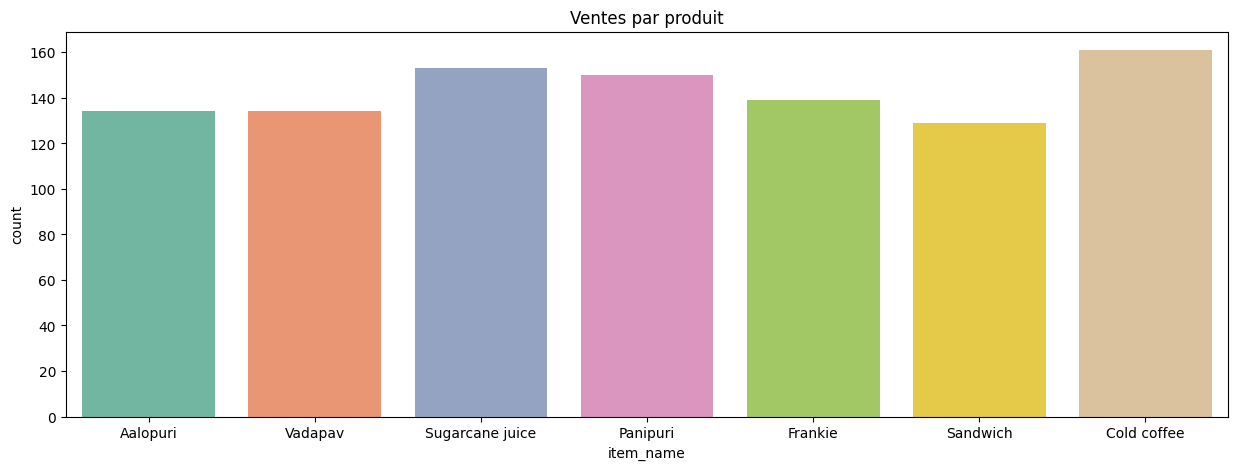

In [67]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='item_name',palette="Set2")
plt.title("Ventes par produit")
plt.show()

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

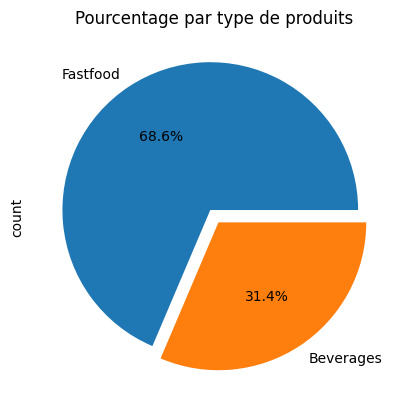

In [68]:
df['item_type'].value_counts().plot(kind ='pie', autopct="%0.1f%%", explode =[0.05, 0.05])
plt.title('Pourcentage par type de produits')
plt.ylabel

In [69]:
food_data = df[df['item_type'] == 'Fastfood']['item_name'].value_counts()
beverage_data = df[df['item_type'] == 'Beverages']['item_name'].value_counts()

Text(0, 0.5, '')

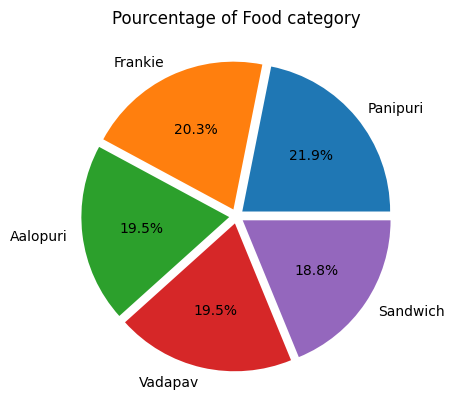

In [70]:
food_data.plot(kind ='pie', autopct="%0.1f%%", explode =[0.05, 0.05, 0.05, 0.05, 0.05])
plt.title('Pourcentage of Food category')
plt.ylabel('')

Text(0, 0.5, '')

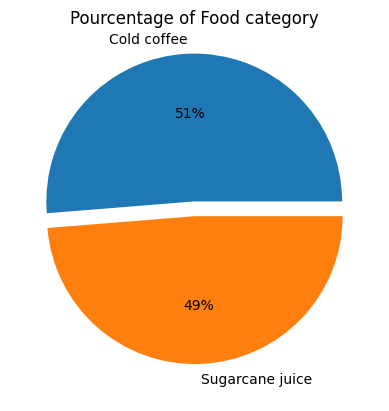

In [71]:
beverage_data.plot(kind ='pie', explode=(0.1,0), autopct='%1.0f%%',)
plt.title('Pourcentage of Food category')
plt.ylabel('')

In [72]:
df['time_of_sale'].unique()

array(['Night', 'Afternoon', 'Evening', 'Morning', 'Midnight'],
      dtype=object)

<Axes: ylabel='count'>

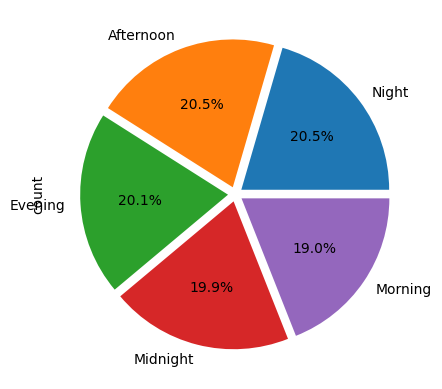

In [73]:
timeofsale = df['time_of_sale'].value_counts()
timeofsale.plot(kind ="pie", autopct="%0.1f%%", explode =[0.05, 0.05, 0.05, 0.05, 0.05])


In [74]:
df['received_by'].value_counts()

received_by
Mr.     512
Mrs.    488
Name: count, dtype: int64

In [116]:
df['transaction_amount'].unique()

array([260, 300,  20, 150, 200, 225, 280, 100, 400, 160, 180,  60, 660,
       220, 600, 250, 440, 520,  80, 500, 240,  40, 480, 140, 420, 840,
       750, 120,  75, 560, 650, 550, 900, 320, 450, 325, 350, 175, 780,
       360,  25, 125, 375,  50, 275, 540, 720, 700], dtype=int64)

In [117]:
df['transaction_amount'].mean()

275.23

<Axes: ylabel='transaction_amount'>

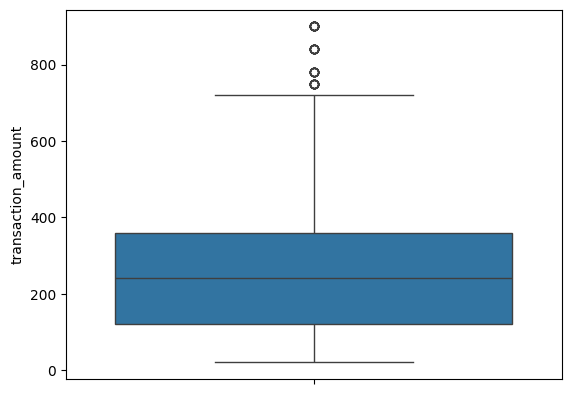

In [76]:
sns.boxplot(y = "transaction_amount", data = df)

Average price of a transaction is around 250-260 dollars.

### Converting date column to european format.

In [ ]:
df['date'] = df['date'].str.replace('-', '/')

In [83]:
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07/03/2022,Aalopuri,Fastfood,20,13,260,unknown,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02/03/2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10/02/2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,unknown,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,unknown,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,unknown,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,unknown,Mrs.,Afternoon


In [98]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y', errors='coerce')
df.head(5)

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,2022-07-03,Aalopuri,Fastfood,20,13,260,unknown,Mr.,Night
1,2,2022-08-23,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,2022-11-20,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,2023-02-03,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,2022-10-02,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [106]:
df['month'] = df['date'].dt.to_period('M')  
monthly_transactions = df['month'].value_counts().sort_index()

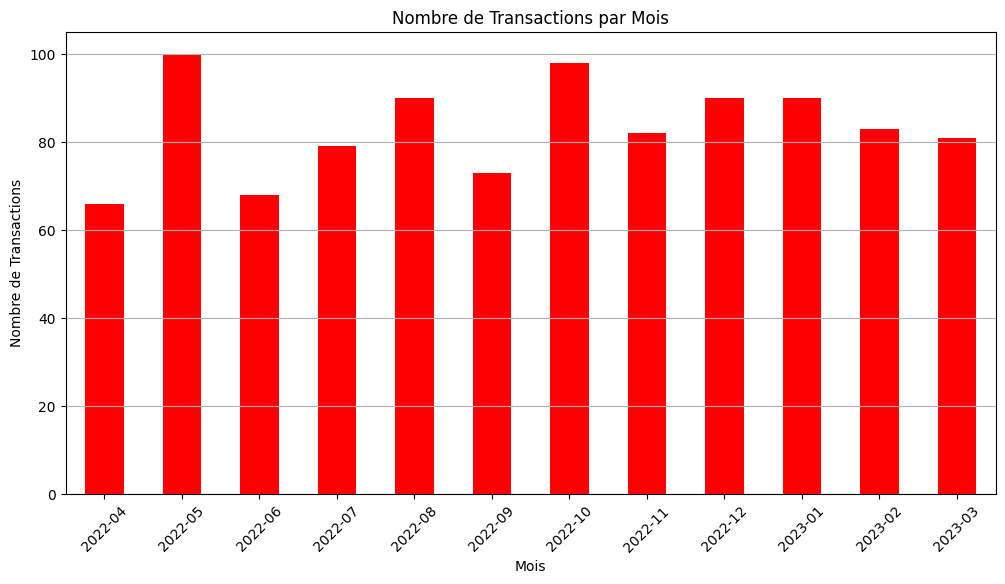

In [105]:
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='bar', color='red')
plt.title("Nombre de Transactions par Mois")
plt.xlabel("Mois")
plt.ylabel("Nombre de Transactions")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [111]:
df['day'] = df['date'].dt.day_name()
weekly_transactions = df['day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).fillna(0) 

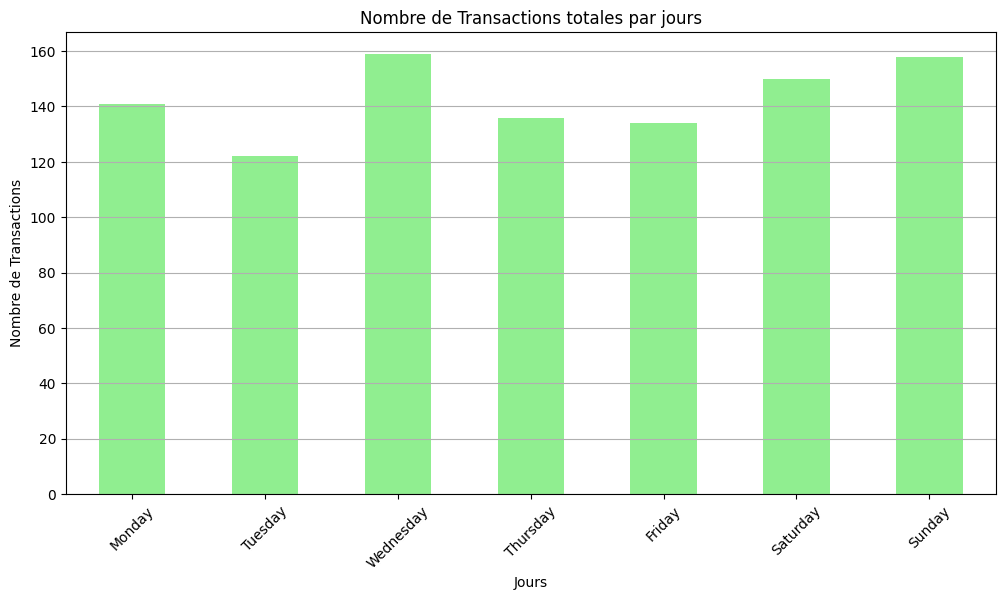

In [114]:
plt.figure(figsize=(12, 6))
weekly_transactions.plot(kind='bar', color='lightgreen')
plt.title("Nombre de Transactions totales par jours")
plt.xlabel("Jours")
plt.ylabel("Nombre de Transactions")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\namdn\AppData\Local\Temp\ipykernel_12820\2808808971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='transaction_type',palette="Set2")


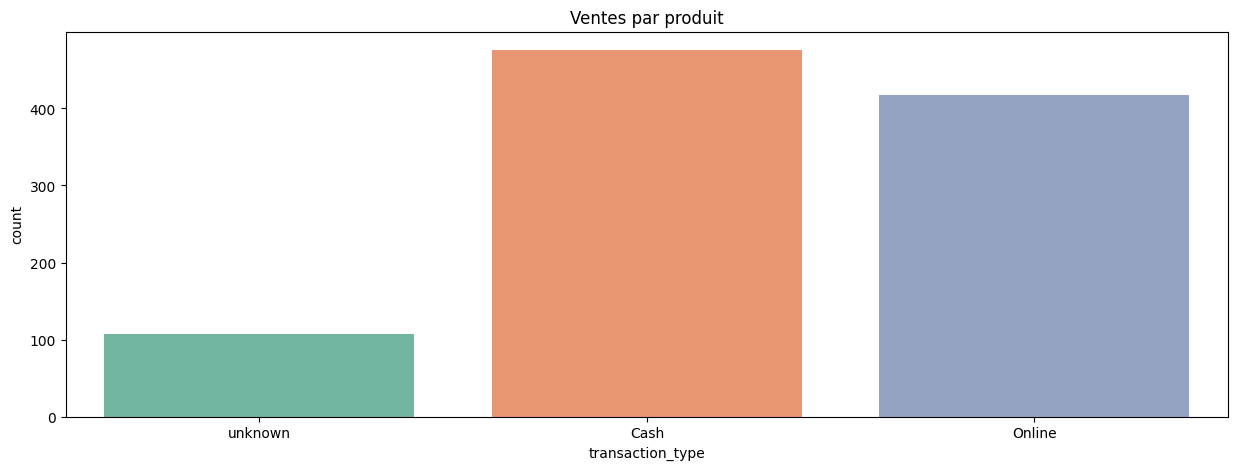

In [80]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='transaction_type',palette="Set2")
plt.title("Ventes par produit")
plt.show()

<Axes: ylabel='quantity'>

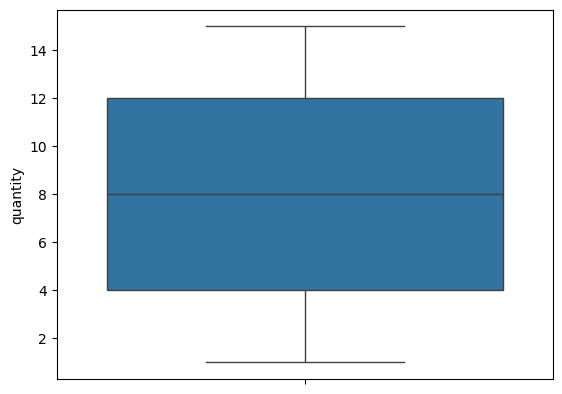

In [81]:
sns.boxplot(y = "quantity", data = df)

In [118]:
df['quantity'].mean()

8.162

### Conclusion

The main insights drawn from this analysis are as follows:
- 68.6 % of orders is food.
- most popular products are beverages : cold coffee and sugarcane juice.
- Panipuri is the most popular food product.
- Night and afternoon are the favorite time to order.
- Men are slighty more likely to order
- average transaction range around 275 dollars
- May 2022 and October 2022 were the months earning the most
- Clients are more likely to order on wednesdays and sundays.
- Cash is the favorite payment method
- Average quantity of products per transactions is 8 items.